# Mini-Project 1: Machine Learning 101

Christian Martel (260867191)

Luka Loignon

Marie Guertin

# PART I: Adult Dataset

Prediction task is to determine whether someone makes over 50K a year.
https://archive.ics.uci.edu/ml/datasets/Adult

## Imports and Setup

In [43]:
import pandas as pd
import numpy as np
import time
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.random.seed(1234)

## Data Preprocessing

### 1. Import Data

In [51]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
train_df = pd.read_csv("data/adult.data", usecols = range(15), names = columns)
test_df = pd.read_csv("data/adult.test", usecols = range(15), names = columns)
display(train_df)
display(test_df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


From the imported datasets, we observe that the capital-gain and capital-loss columns contain mostly zeros. These columns are not important features so they will be removed.

Also, we observe that categorical data labels are not stripped.

We can observe that the first row of the test dataset contains junk data, so this row will be removed.

### 2. Strip the Object Data

In [52]:
train_df_obj = train_df.select_dtypes(['object'])
test_df_obj = test_df.select_dtypes(['object'])

train_df[train_df_obj.columns] = train_df_obj.apply(lambda x: x.str.strip())
test_df[test_df_obj.columns] = test_df_obj.apply(lambda x: x.str.strip())

### 3. Remove Useless Columns and Rows

In [53]:
train_df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)
test_df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

test_df.drop(labels=0, inplace = True)

### Check all different unique values per category

In [54]:
# print unique values for each column
for c in train_df.columns:
    if pd.api.types.is_object_dtype(train_df[c]):
        print("{c}: ".format(c=c), train_df[c].unique())

workclass:  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education:  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status:  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation:  ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship:  ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race:  ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex:  ['Male' 'Female']
native-country:  ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

From the list of different values for each category, we observe that for categorical data, the unknown categories are represented by '?'. Hence, we will impute '?' values with the most occurring category in the column.

### 4. Data Imputation

For continuous data: replace Nan values with mean value of column

For categorical data: replace Nan values and '?' values with most occurring features

In [55]:
for columnName in train_df.columns:
    if pd.api.types.is_numeric_dtype(train_df[columnName]):
        # fill with mean
        train_df[columnName].fillna(train_df[columnName].mean(), inplace=True)
        test_df[columnName].fillna(test_df[columnName].mean(), inplace=True)
    else:
        # fill with most occurring value
        train_df[columnName].fillna(train_df[columnName].mode(), inplace=True)
        test_df[columnName].fillna(test_df[columnName].mode(), inplace=True)
        
        # fill '?' with most occurring value
        train_df[columnName].replace(to_replace= '?', value=train_df[columnName].mode().iloc[0], inplace=True)
        test_df[columnName].replace(to_replace= '?', value=test_df[columnName].mode().iloc[0], inplace=True)

### 5. Numerize Prediction Variable 

Pre

- '>50K': 1
- '<=50K': 0

In [56]:
train_df['salary'] = train_df['salary'].apply(lambda x: 1 if (x == '>50K') else 0)
test_df['salary'] = test_df['salary'].apply(lambda x: 1 if (x == '>50K') else 0)
display(train_df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


### 6. Categorical Features One-Hot-Encoding 

In [57]:
for c in train_df.columns:    
    if pd.api.types.is_object_dtype(train_df[c]):
        # concatenante one hot encoded dummies columns
        train_df, test_df = pd.concat([train_df, pd.get_dummies(train_df[c], prefix = c, prefix_sep = '_')], axis = 1), pd.concat([test_df, pd.get_dummies(train_df[c], prefix = c, prefix_sep = '_')], axis = 1)

        # drop old columns
        train_df.drop(columns = c, inplace=True)
        test_df.drop(columns = c, inplace=True)
        
# move prediction column to the end after one-hoy-encoding process
train_df, test_df = pd.concat([train_df, train_df.pop('salary')],axis=1), pd.concat([test_df, test_df.pop('salary')],axis=1)
display(train_df)

,age,fnlwgt,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary
0,39,77516,13,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Cross Validation

helper method to perform the splits for L-fold cross-validation

In [58]:
def cross_validate_splits(n, n_folds=5):
    # get the number of data samples in each split
    splits = []
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        # get the validation indexes
        val_inds = list(range(f * n_val, (f+1) * n_val))
        
        # get the training indexes
        tr_inds = list()
        if f < n_folds - 1:
            tr_inds = list(range((f+1) * n_val, n))
        
        if f > 0:
            tr_inds = tr_inds + list(range(0, f * n_val))
        splits.append((tr_inds, val_inds))
    return splits

## Validation Metrics

In [59]:
# define MSE loss function
loss = lambda y, y_pred: np.mean((y-y_pred)**2)

#define accuracy function
accuracy = lambda y, y_pred: np.sum(y == y_pred)/y.size

## KNN Cross-Validation

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# convert to numpy arrays
train, test = train_df.to_numpy(), test_df.to_numpy()

num_instances = train.shape[0]

x, y = train[:, :-1], train[:, -1]
x_test, y_test = test[:, :-1], test[:, -1]

# number of folds for L-fold cross-validation
L = 5

def knn_cross_validation(x, y, K_list, L):

    num_instances = x.shape[0]
        
    # l-fold cross validation splits
    n_folds_splits = cross_validate_splits(num_instances, n_folds=L)

    # K x L matrix
    err_val_matrix, acc_val_matrix = np.zeros((len(K_list),L)), np.zeros((len(K_list),L))
    err_train_matrix, acc_train_matrix = np.zeros((len(K_list),L)), np.zeros((len(K_list),L))

    for i, K in enumerate(K_list):
        model = KNeighborsClassifier(n_neighbors=K)
        for j, split in enumerate(n_folds_splits):
            # split into train set and validation set
            x_train, x_val = x[split[0], :], x[split[1], :]
            y_train, y_val = y[split[0]], y[split[1]]

            model.fit(x_train, y_train)

            y_pred_val = model.predict(x_val)
            y_pred_train = model.predict(x_train)
            
            err_val = loss(y_val, y_pred_val)            
            err_train = loss(y_train, y_pred_train)

            err_val_matrix[i][j] = err_val
            err_train_matrix[i][j] = err_train

    return err_val_matrix, err_train_matrix

## Visualization

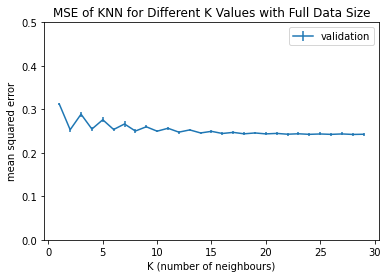

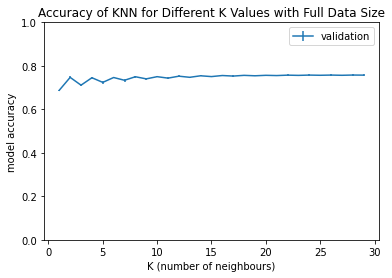

In [8]:
# Visualization on full dataset

K_list = range(1,21)
err_val_matrix, err_train_matrix = knn_cross_validation(x, y, K_list, L)

plt.title('MSE of KNN for Different K Values with Full Data Size')
plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(K_list, np.mean(err_matrix, axis=1), np.std(err_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.ylim(0,0.5)
plt.show()

## Sample Growing Data

Test with different training data sizes

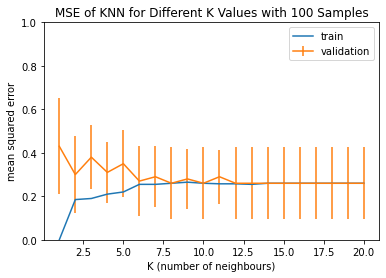

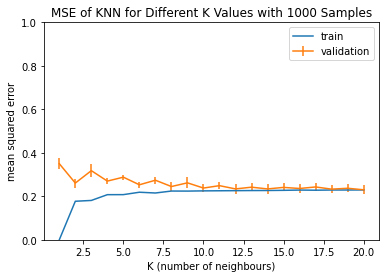

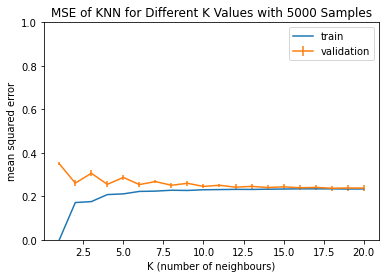

In [ ]:
sizes = [100, 1000, 5000, 10000]

inds = np.random.permutation(range(train.shape[0]))

# K range list
K_list = range(1,21)

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x[inds[:s]], y[inds[:s]]
    
    # apply cross validation to get validation and train error matrices 
    err_val_matrix, err_train_matrix = knn_cross_validation(x_subset, y_subset, K_list, L)
    
    plt.title('MSE of KNN for Different K Values with {size} Samples'.format(size = s))
    plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(K_list, np.mean(err_val_matrix, axis=1), np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('K (number of neighbours)')
    plt.ylabel('mean squared error')
    plt.ylim(0,1)
    plt.show()